In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as snb
from sklearn.preprocessing import LabelEncoder

In [2]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [3]:

df= pd.read_csv('diabetic_data.csv', delimiter=',')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 101766 rows and 50 columns


In [4]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [7]:
for i in df.columns:
    if np.array(df[i].value_counts())[0]>101750:
        print(df[i].value_counts())


No        101765
Steady         1
Name: acetohexamide, dtype: int64
No        101763
Steady         3
Name: troglitazone, dtype: int64
No    101766
Name: examide, dtype: int64
No    101766
Name: citoglipton, dtype: int64
No        101753
Steady        13
Name: glipizide-metformin, dtype: int64
No        101765
Steady         1
Name: glimepiride-pioglitazone, dtype: int64
No        101764
Steady         2
Name: metformin-rosiglitazone, dtype: int64
No        101765
Steady         1
Name: metformin-pioglitazone, dtype: int64


In [8]:
df['patient_nbr'].value_counts()

88785891     40
43140906     28
1660293      23
88227540     23
23199021     23
             ..
11005362      1
98252496      1
1019673       1
13396320      1
175429310     1
Name: patient_nbr, Length: 71518, dtype: int64

In [9]:
df['encounter_id'].value_counts()

2278392      1
190792044    1
190790070    1
190789722    1
190786806    1
            ..
106665324    1
106657776    1
106644876    1
106644474    1
443867222    1
Name: encounter_id, Length: 101766, dtype: int64

In [10]:
df.drop(['glimepiride-pioglitazone','metformin-pioglitazone','patient_nbr','encounter_id','acetohexamide','troglitazone','examide','citoglipton'],axis=1,inplace=True)

In [11]:
df.replace('?',np.nan,inplace=True)

In [12]:
for i in df.columns:
    if df[i].isna().sum()>0:
        print(i,df[i].isna().sum()*100/len(df))

race 2.2335554114340743
weight 96.85847925633315
payer_code 39.5574160328597
medical_specialty 49.08220820313268
diag_1 0.020635575732562937
diag_2 0.3517874339170253
diag_3 1.398305917497003


In [13]:
df.drop(['payer_code','medical_specialty','weight'],axis=1,inplace=True)

In [14]:
df.dropna(inplace=True)

In [15]:
df['race'].isna().sum()

0

In [16]:
df=df[df.gender!='Unknown/Invalid']

In [17]:
df['gender'].value_counts()

Female    52833
Male      45219
Name: gender, dtype: int64

In [18]:
df.readmitted = [1 if each=='<30' else 0 for each in df.readmitted]

In [19]:
Transformer=LabelEncoder()
for col in df.columns:
    Transformer.fit(df[col]) 
    df[col]=Transformer.fit_transform(df[col])

In [20]:
df[~df.applymap(np.isreal).all(1)]

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,acarbose,miglitol,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,change,diabetesMed,readmitted


In [21]:
df.dtypes

race                        int32
gender                      int32
age                         int32
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
diag_1                      int32
diag_2                      int32
diag_3                      int32
number_diagnoses            int64
max_glu_serum               int32
A1Cresult                   int32
metformin                   int32
repaglinide                 int32
nateglinide                 int32
chlorpropamide              int32
glimepiride                 int32
glipizide                   int32
glyburide                   int32
tolbutamide                 int32
pioglitazone                int32
rosiglitazone               int32
acarbose      

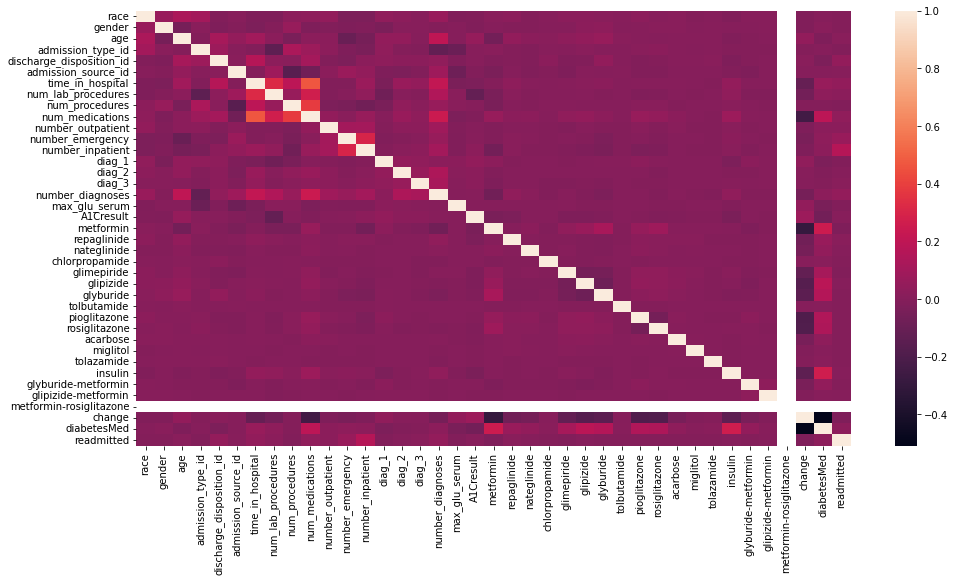

In [22]:
plt.figure(figsize=(16,8))
corr_matrix = df.corr()
snb.heatmap(corr_matrix)
plt.show()

In [23]:
df.readmitted.value_counts()

0    86986
1    11066
Name: readmitted, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from sklearn import model_selection

from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics 

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix as cm

In [25]:
from sklearn.model_selection import train_test_split

X, y = df.loc[:,df.columns!='readmitted'],df['readmitted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(78441, 38) (19611, 38) (78441,) (19611,)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
thresh = 0.5

In [28]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(58830, 38) (19611, 38) (58830,) (19611,)


In [29]:
def calc_specificity(y_actual, y_pred, thresh):
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    fscore = f1_score(y_actual,(y_pred > thresh) )
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('fscore:%.3f'%fscore)
    print('specificity:%.3f'%specificity)
    print(' ')
    return accuracy, recall, precision,fscore, specificity

def roc_auc(pred, act, plot=True, label = "curve"):
    prob = pred/pred.max() #normalize
    fpr, tpr, threshold = sklearn.metrics.roc_curve(act, prob, drop_intermediate=True)    
    auc = sklearn.metrics.auc(fpr, tpr)

    if plot:
        plt.scatter(x=fpr, y=tpr, color='navy')
        rcolor = tuple(np.random.rand(3,1)[:,0])
        plt.plot(fpr, tpr, c=rcolor, lw=2, label=label + ' (AUC = %0.3f)' % auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

    return auc

In [37]:
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('ADA', AdaBoostClassifier()))
models.append(('MLPC', MLPClassifier(solver='lbfgs', alpha=1e5,hidden_layer_sizes=(5, 5), random_state=1)))
models.append(('SVM', SVC()))
results=[]
names=[]
for name, model in models:
    kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    cv_results=model_selection.cross_val_score(model,X_train,y_train,cv=kfold,scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg="%s:%f" % (name,cv_results.mean())
    print(msg)

LR:0.886452
LDA:0.884498
KNN:0.877545
CART:0.794578
NB:0.612188
RFC:0.886741
XGB:0.885433
ADA:0.886113


C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nicol\AppData

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
C_params = [10**x for x in np.arange(-2.5,2.5,0.1)]
param_grid = {
        'penalty':['l1'], #lasso only
        'C':C_params
}


clf = GridSearchCV(LogisticRegression(C=1, penalty='l1', solver='liblinear'), param_grid, cv=5, scoring='roc_auc', verbose=3, n_jobs=10)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   27.4s
[Parallel(n_jobs=10)]: Done 108 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 250 out of 250 | elapsed:  6.3min finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(C=1, penalty='l1',
                                          solver='liblinear'),
             n_jobs=10,
             param_grid={'C': [0.0031622776601683794, 0.003981071705534973,
                               0.005011872336272725, 0.006309573444801936,
                               0.00794328234724282, 0.01000000000000001,
                               0.012589254117941687, 0.01584893192461116,
                               0.01995262314968883, 0.025118864315095846,
                               0.03162277660168386, 0.0398107170...
                               0.07943282347242837, 0.10000000000000031,
                               0.12589254117941714, 0.1584893192461119,
                               0.1995262314968887, 0.251188643150959,
                               0.3162277660168392, 0.398107170553499,
                               0.5011872336272746, 0.6309573444801962,
                               0.7943

In [ ]:
lr = clf.best_estimator_
feat_imp = pd.Series(index=X_train.columns, data=lr.coef_[0])
feat_imp.sort_values(ascending=False)

number_inpatient            0.260207
diabetesMed                 0.201648
number_emergency            0.048935
number_diagnoses            0.039585
age                         0.026887
discharge_disposition_id    0.024003
time_in_hospital            0.017722
gender                      0.013732
A1Cresult                   0.011102
num_medications             0.005382
diag_3                      0.000030
tolazamide                  0.000000
tolbutamide                 0.000000
glipizide-metformin         0.000000
metformin-rosiglitazone     0.000000
repaglinide                 0.000000
diag_2                     -0.000176
diag_1                     -0.000188
num_lab_procedures         -0.000320
race                       -0.004488
glipizide                  -0.004738
admission_source_id        -0.004881
number_outpatient          -0.008099
admission_type_id          -0.015188
num_procedures             -0.028595
insulin                    -0.031964
max_glu_serum              -0.041921
c

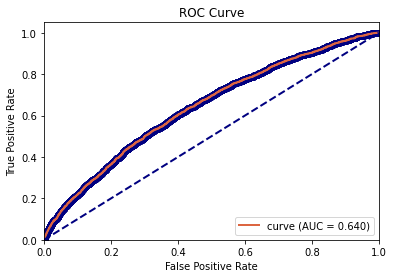

0.640174764472799

In [ ]:
pred = lr.predict_proba(X_test)[:,1]
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, pred, drop_intermediate=True)    
df_res = pd.DataFrame(data={'fpr':fpr, 'tpr':tpr, 'threshold':threshold})
df_res = df_res[['threshold','fpr','tpr']]
sklearn.metrics.auc(fpr, tpr)
t=y.value_counts()[1]/y.value_counts().sum()
sklearn.metrics.f1_score(y_test, pred>t)
sklearn.metrics.accuracy_score(y_test, pred>t)
roc_auc(pred, y_test)

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc', verbose=0, n_jobs=10)
rf.fit(X_train, y_train)

In [ ]:
rf = clf.best_estimator_
feat_imp = pd.Series(index=X_train.columns, data=rf.coef_[0])
feat_imp.sort_values(ascending=False)

In [ ]:
pred = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, pred, drop_intermediate=True)    
df_res = pd.DataFrame(data={'fpr':fpr, 'tpr':tpr, 'threshold':threshold})
df_res = df_res[['threshold','fpr','tpr']]
sklearn.metrics.auc(fpr, tpr)
t=y.value_counts()[1]/y.value_counts().sum()
sklearn.metrics.f1_score(y_test, pred>t)
sklearn.metrics.accuracy_score(y_test, pred>t)

roc_auc(pred, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr2 = LogisticRegression(C=.015, penalty='l1',solver='liblinear')
lr2.fit(X_train, y_train)

LogisticRegression(C=0.015, penalty='l1', solver='liblinear')

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver = "liblinear",C=.015, penalty='l1')
log_model.fit(X_train,y_train)
pred = log_model.predict_proba(X_test)[:,1]

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred>0.05)

0.1103972260466065

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100, max_depth=3)
random_forest_model.fit(X_train, y_train) 

y_train_preds = random_forest_model.predict_proba(X_train)[:,1]
y_val_preds = random_forest_model.predict_proba(X_val)[:,1]

print("Random Forest")
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision,rf_train_fscore, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_val_auc, rf_val_accuracy, rf_val_recall, rf_val_precision,rf_val_fscore, rf_val_specificity = print_report(y_val,y_val_preds, thresh)

Random Forest
Training:
AUC:0.647
accuracy:0.886
recall:0.000
precision:0.000
fscore:0.000
specificity:1.000
 


C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: not enough values to unpack (expected 6, got 5)

In [ ]:
from xgboost import XGBRegressor
reg = XGBRegressor()
reg.fit(X_train, y_train)

y_test_pred = reg.predict(X_test)
acc_xgb = r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',mean_absolute_error(y_test, y_test_pred))
print('MSE:',mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_test_pred)))

R^2: 0.002604371877172218
Adjusted R^2: 0.0006678792413318257
MAE: 0.19180599059142786
MSE: 0.10083304507444076
RMSE: 0.31754219416392643


In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
0,Linear Regression,100.000000
2,XGBoost,0.000000
1,Random Forest,-32.724937
